In [1]:
import sys
sys.path.append('../')
from IPython.display import Latex
import latexStrings as ls
import numpy as np
import scipy.linalg as linear
from eigenvalues import *
from matplotlib import pyplot as plt
import imageio

# Ejercicio 7

Queremos probar el metodo SVD. Para esto, primero cargamos una imagen original:

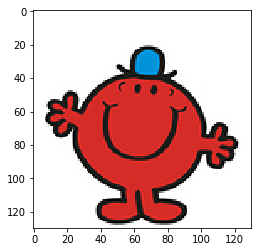

In [2]:
img = imageio.imread("assets/small.jpg")
plt.imshow(img)
plt.show()

Luego separamos los valores RGB en 3 matrices:

In [3]:
img = img.astype('float')
red = np.array(img[:,:,0])
green = np.array(img[:,:,1])
blue = np.array(img[:,:,2])

Hagamos una prueba sin reducir el rango de la matriz:

In [4]:
tolerance = 0

In [5]:
u1, s1, v1 = SVD(red,tolerance)
u2, s2, v2 = SVD(green,tolerance)
u3, s3, v3 = SVD(blue,tolerance)

En este caso, vemos que el rango original es:

In [6]:
len(s1), len(s2), len(s3)

(115, 117, 117)

D:\Anaconda3\lib\site-packages\imageio\core\util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.6853870827068835e-10, 255.00000508211502]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


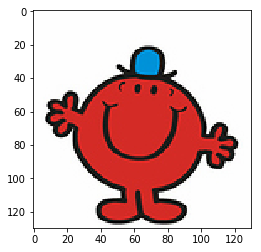

In [7]:
plt.imshow(makeNewImg([u1,s1,v1],[u2,s2,v2],[u3,s3,v3], 'assets\\tol_0.png'))
plt.show()

En efecto, el proceso no modifico la imagen.

Ahora apliquemos el SVD economizado cortando los valores singulares menores a 100:

In [8]:
tolerance = 100

In [9]:
u1, s1, v1 = SVD(red,tolerance)
u2, s2, v2 = SVD(green,tolerance)
u3, s3, v3 = SVD(blue,tolerance)

In [10]:
len(s1), len(s2), len(s3)

(72, 65, 65)

Observamos que el rango de la matriz es casi la mitad del original. Pero como afecta esto a la imagen?


D:\Anaconda3\lib\site-packages\imageio\core\util.py:104: UserWarning: Conversion from float64 to uint8, range [-11.907044774825579, 271.7185320030364]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


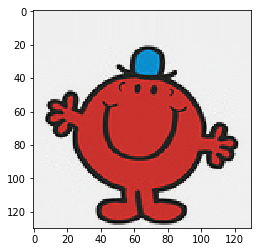

In [11]:
plt.imshow(makeNewImg([u1,s1,v1],[u2,s2,v2],[u3,s3,v3], 'assets\\tol_100.png'), )
plt.show()

No hubo perdida de detalle, salvo el tono blanco del fondo

Probemos un orden de magnitud mayor en la tolerancia...

In [12]:
tolerance = 1000

In [13]:
u1, s1, v1 = SVD(red,tolerance)
u2, s2, v2 = SVD(green,tolerance)
u3, s3, v3 = SVD(blue,tolerance)

In [14]:
len(s1), len(s2), len(s3)

(16, 11, 11)

Los rangos de las matrices son ahora un decimo de su valor original. Como sigue la imagen?

D:\Anaconda3\lib\site-packages\imageio\core\util.py:104: UserWarning: Conversion from float64 to uint8, range [-66.82590406553962, 351.70324585962413]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


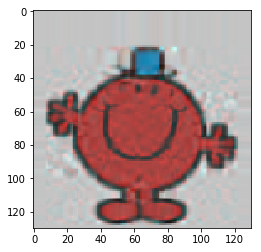

In [15]:
plt.imshow(makeNewImg([u1,s1,v1],[u2,s2,v2],[u3,s3,v3], 'assets\\tol_1000.png'))
plt.show()

A pesar de que existe una evidente perdida de detalle, aun es posible reconozer la imagen original

Ahora veamos que pasa cuando reducimos a solo los 3 valores singulares mayores de cada matriz

In [16]:
n = 3

In [17]:
u1, s1, v1 = SVD(red, n = n)
u2, s2, v2 = SVD(green, n = n)
u3, s3, v3 = SVD(blue, n = n)

In [18]:
len(s1), len(s2), len(s3)

(3, 3, 3)

D:\Anaconda3\lib\site-packages\imageio\core\util.py:104: UserWarning: Conversion from float64 to uint8, range [-37.041123150122665, 322.0593925619256]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


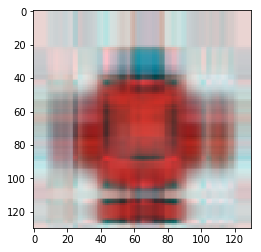

In [19]:
plt.imshow(makeNewImg([u1,s1,v1],[u2,s2,v2],[u3,s3,v3], 'assets\\rank_3.png'))
plt.show()

La imagen original esta basicamente perdida, pero aun es posible reconocer la forma.

Que tal si tomamos solo el valor singular dominante?

In [20]:
n = 1

In [21]:
u1, s1, v1 = SVD(red, n = n)
u2, s2, v2 = SVD(green, n = n)
u3, s3, v3 = SVD(blue, n = n)

In [22]:
len(s1), len(s2), len(s3)

(1, 1, 1)

D:\Anaconda3\lib\site-packages\imageio\core\util.py:104: UserWarning: Conversion from float64 to uint8, range [46.18204408365909, 318.48377516258523]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


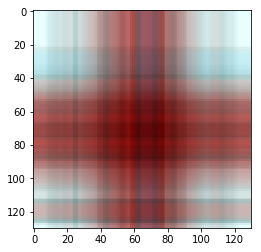

In [23]:
plt.imshow(makeNewImg([u1,s1,v1],[u2,s2,v2],[u3,s3,v3], 'assets\\rank_1.png'))
plt.show()

La imagen se pierde totalmente, y solo permanecen los colores dominantes en sus posiciones relativas.